# <center>Titanic Survival Prediction</center>

## Importing libraries

In [380]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataframes

In [381]:
# Loading dataframe
df_gender = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\gender_submission.csv')
df_test = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\test.csv')
df_train = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\train.csv')

In [382]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [383]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Null treatment

In [384]:
# Description of training data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [385]:
# Total null count in dataframe
print(df_train.isna().sum()/len(df_train)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [386]:
# Determining the title of passengers
import re
df_train['Title'] = df_train['Name'].apply(lambda x: re.split(', |. ',x)[1])
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Title           31
dtype: int64

In [387]:
# Cabin column has 687 rows out of 891 is blank(78%) with a lot of distinct values which wont impact the model
# Removing title from name because there are too many unique values which wont impact the prediction
df_train.drop(columns=['Name','Title','Cabin'],inplace=True)

## Categorical variable treatment

In [388]:
# UDF to perform hot encoding on the labelled data
def hot_encoding(dataframe,column):
    encoded_df = pd.get_dummies(dataframe.loc[:,column], drop_first=True)
    frames = [dataframe,encoded_df]
    output_df = pd.concat(frames,axis=1)
    output_df.drop(columns=column,inplace=True)
    return output_df

### PClass, Embarked, Sex column manipulation

In [389]:
df_train['Travelclass'] = df_train['Pclass'].apply(lambda x: 'Tier1' if x==1 else 'Tier2' if x==2  else 'Tier3')
df_train.drop(columns='Pclass',inplace=True)

In [390]:
df_train = hot_encoding(df_train,'Embarked')
df_train = hot_encoding(df_train,'Sex')
df_train = hot_encoding(df_train,'Travelclass')
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Q,S,male,Tier2,Tier3
0,1,0,22.0,1,0,A/5 21171,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,35.0,1,0,113803,53.1000,0,1,0,0,0
4,5,0,35.0,0,0,373450,8.0500,0,1,1,0,1


### Ticket column manipulation

In [391]:
# While describing data, we got to know that ticket is not unique. So, in order to check the usability of the column, we might require manipulation
df_ticket_pass_count = df_train.groupby(['Ticket'],as_index=False)['PassengerId'].count().sort_values('PassengerId',ascending=False)

# Renaming the count of ticket column
df_ticket_pass_count.rename(columns={'Ticket':'Ticket','PassengerId':'Unique_ticket'},inplace=True)
df_ticket_pass_count.head(2)

,Ticket,Unique_ticket
80,1601,7
568,CA. 2343,7


<AxesSubplot:xlabel='Unique_ticket', ylabel='Density'>

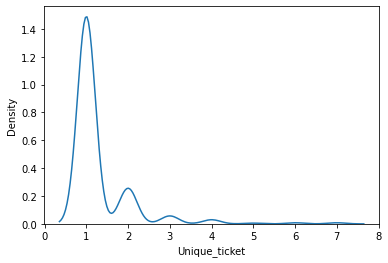

In [392]:
# Checking the distribution of unique tickets 
sns.kdeplot(df_ticket_pass_count['Unique_ticket'])

In [393]:
# UDF to determine the unique ticket status 
def unique_ticket_status(x):
    if(x > 1):
        unique=0
    else:
        unique=1
    return unique

In [394]:
# Determining unique status of ticket
df_ticket_pass_count['Unique_ticket_status'] = df_ticket_pass_count['Unique_ticket'].apply(lambda x: 0 if x > 1 else 1)

In [395]:
# Removing the columns as it has been used to detemine unique ticket status
df_ticket_pass_count.drop(columns=['Unique_ticket'],inplace=True)

In [396]:
# Fetching the stauts of ticket in the original dataframe
df_train = df_train.merge(df_ticket_pass_count,how='left',on='Ticket')

In [397]:
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Q,S,male,Tier2,Tier3,Unique_ticket_status
0,1,0,22.0,1,0,A/5 21171,7.2500,0,1,1,0,1,1
1,2,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0,1
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1
3,4,1,35.0,1,0,113803,53.1000,0,1,0,0,0,0
4,5,0,35.0,0,0,373450,8.0500,0,1,1,0,1,1


### Sibling and Parent column manipulation

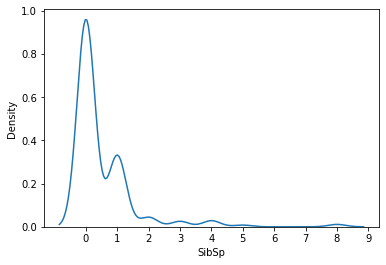

In [398]:
# Sibling count distribution
ax = sns.kdeplot(df_train['SibSp'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

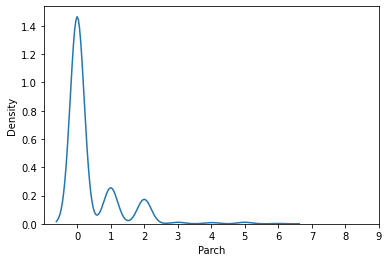

In [399]:
# Sibling count distribution
ax = sns.kdeplot(df_train['Parch'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [400]:
# From both the distribution above, we can categorize siblings and parents into one single feature that whether parent/sibling is present or not
df_train['Sibling_present'] = df_train.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)
df_train['Parent_present'] = df_train.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)


In [401]:
df_train.drop(columns=['SibSp','Parch','Ticket','Fare'],inplace=True)
df_train.head()

,PassengerId,Survived,Age,Q,S,male,Tier2,Tier3,Unique_ticket_status,Sibling_present,Parent_present
0,1,0,22.0,0,1,1,0,1,1,1,1
1,2,1,38.0,0,0,0,0,0,1,1,1
2,3,1,26.0,0,1,0,0,1,1,0,0
3,4,1,35.0,0,1,0,0,0,0,1,1
4,5,0,35.0,0,1,1,0,1,1,0,0


## Missing value treatment for Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

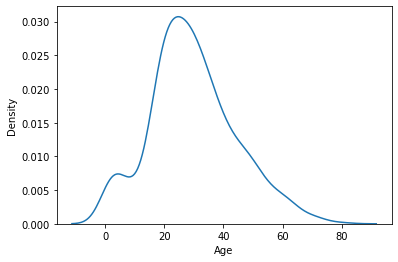

In [402]:
sns.kdeplot(df_train['Age'])

In [406]:
# It could be seen that there is very low correaltion between age and other columns
df_train[~df_train['Age'].isna()].corr()

,PassengerId,Survived,Age,Q,S,male,Tier2,Tier3,Unique_ticket_status,Sibling_present,Parent_present
PassengerId,1.000000,0.029340,0.036847,-0.026954,0.004621,0.024575,-0.003115,-0.028276,0.013609,-0.055611,-0.055611
Survived,0.029340,1.000000,-0.077221,-0.049549,-0.164235,-0.538826,0.084753,-0.337587,-0.221135,0.098120,0.098120
Age,0.036847,-0.077221,1.000000,-0.022405,-0.032523,0.093254,0.006954,-0.312271,0.181341,-0.162893,-0.162893
Q,-0.026954,-0.049549,-0.022405,1.000000,-0.375934,-0.026440,-0.080567,0.145442,0.037639,-0.023290,-0.023290
S,0.004621,-0.164235,-0.032523,-0.375934,1.000000,0.115167,0.170636,0.097755,0.108414,-0.025138,-0.025138
male,0.024575,-0.538826,0.093254,-0.026440,0.115167,1.000000,-0.073036,0.161520,0.278561,-0.172917,-0.172917
Tier2,-0.003115,0.084753,0.006954,-0.080567,0.170636,-0.073036,1.000000,-0.562330,-0.010106,0.035334,0.035334
Tier3,-0.028276,-0.337587,-0.312271,0.145442,0.097755,0.161520,-0.562330,1.000000,0.191562,-0.087610,-0.087610
Unique_ticket_status,0.013609,-0.221135,0.181341,0.037639,0.108414,0.278561,-0.010106,0.191562,1.000000,-0.513860,-0.513860
Sibling_present,-0.055611,0.098120,-0.162893,-0.023290,-0.025138,-0.172917,0.035334,-0.087610,-0.513860,1.000000,1.000000


In [412]:
# The next steps is to use measures of central tendency 
mean_age = round(df_train[~df_train['Age'].isna()].loc[:,'Age'].mean(),2)
median_age = df_train[~df_train['Age'].isna()].loc[:,'Age'].median()
mode_age = df_train[~df_train['Age'].isna()].loc[:,'Age'].mode()
print('Average age of passenger: ', mean_age)
print('Median age of the passenger: ',median_age)
print('Most of the passengers are of age:',mode_age)

Average age of passenger:  29.7
Median age of the passenger:  28.0
Most of the passengers are of age: 0    24.0
dtype: float64


In [ ]:
# Lets use each of these and determine which gives much better accuracy
df_age_accuracy = df_train[~df_train['Age'].isna()].loc[:,'Age']
df_age_accuracy['mean_age'] = mean_age
df_age_accuracy['mean_age'] = mean_age
df_age_accuracy['mean_age'] = mean_age